# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_temp.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    "barbados",
    "belize",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    "uruguay"
]

In [12]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions
)


2022-12-14 03:11:12,011 - INFO - Successfully initialized SISEPUEDEFileStructure.
2022-12-14 03:11:12,014 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2022-12-14 03:11:12,015 - INFO - 	Setting export engine to 'sqlite'.
2022-12-14 03:11:12,020 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2022-12-14 03:11:12,021 - INFO - Successfully instantiated table ANALYSIS_METADATA
2022-12-14 03:11:12,028 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2022-12-14 03:11:12,029 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2022-12-14 03:11:12,038 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2022-12-14 03:11:12,039 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2022-12-14 03:11:12,047 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [13]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": [0, 3001]
}

dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2022-12-14 03:48:05,317 - INFO - Running AFOLU model
2022-12-14 03:48:05,674 - INFO - AFOLU model run successfully completed
2022-12-14 03:48:05,674 - INFO - Running CircularEconomy model
2022-12-14 03:48:05,791 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:48:05,792 - INFO - Running IPPU model
2022-12-14 03:48:05,900 - INFO - IPPU model run successfully completed
2022-12-14 03:48:05,901 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:48:05,938 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:48:06,086 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:48:06,087 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2022-14-Dec 03:48:07.879 Started modeling scenario.
2022-14-Dec 03:48:07.882 Validated run-time arguments.
2022-14-Dec 03:48:07.892 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:48:07.958 Dropped pre-existing result tables from database.
2022-14-Dec 03:48:07.959 Verified that transmission modeling is not enabled.
2022-14-Dec 03:48:08.088 Created parameter views and indices.
2022-14-Dec 03:48:08.094 Created temporary tables.
2022-14-Dec 03:48:15.370 Executed core database queries.
2022-14-Dec 03:48:15.372 Defined dimensions.
2022-14-Dec 03:48:15.395 Defined demand variables.
2022-14-Dec 03:48:15.405 Defined storage variables.
2022-14-Dec 03:48:15.408 Defined capacity variables.
2022-14-Dec 03:48:16.874 Defined activity variables.
2022-14-Dec 03:48:16.883 Defined costing variables.
2022-14-Dec 03:48:16.885 Defined reserve margin variables.
2022-14-Dec 03:48:17.139 Defined emissi

2022-12-14 03:48:27,307 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:48:27,332 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:48:27,415 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:48:27,418 - INFO - Model run for primary_id = 0 successfully completed in 22.1 seconds.
2022-12-14 03:48:27,429 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:48:27,762 - INFO - AFOLU model run successfully completed
2022-12-14 03:48:27,763 - INFO - Running CircularEconomy model
2022-12-14 03:48:27,859 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:48:27,861 - INFO - Running IPPU model
2022-12-14 03:48:27,963 - INFO - IPPU model run successfully completed
2022-12-14 03:48:27,964 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:48:28,000 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:48:28,147 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:48:28,150 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:48:29.674 Started modeling scenario.
2022-14-Dec 03:48:29.674 Validated run-time arguments.
2022-14-Dec 03:48:29.678 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:48:29.688 Dropped pre-existing result tables from database.
2022-14-Dec 03:48:29.689 Verified that transmission modeling is not enabled.
2022-14-Dec 03:48:29.766 Created parameter views and indices.
2022-14-Dec 03:48:29.772 Created temporary tables.
2022-14-Dec 03:48:32.550 Executed core database queries.
2022-14-Dec 03:48:32.552 Defined dimensions.
2022-14-Dec 03:48:32.562 Defined demand variables.
2022-14-Dec 03:48:32.568 Defined storage variables.
2022-14-Dec 03:48:32.569 Defined capacity variables.
2022-14-Dec 03:48:33.665 Defined activity variables.
2022-14-Dec 03:48:33.672 Defined costing variables.
2022-14-Dec 03:48:33.672 Defined reserve margin variables.
2022-14-Dec 03:48:33.697 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:48:43,018 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:48:43,042 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:48:43,131 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:48:43,134 - INFO - Model run for primary_id = 5005 successfully completed in 15.71 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:48:43,675 - INFO - Table MODEL_OUTPUT successfully written to database.
2022-12-14 03:48:44,476 - INFO - Running AFOLU model
2022-12-14 03:48:44,778 - INFO - AFOLU model run successfully completed
2022-12-14 03:48:44,778 - INFO - Running CircularEconomy model
2022-12-14 03:48:44,873 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:48:44,874 - INFO - Running IPPU model
2022-12-14 03:48:44,981 - INFO - IPPU model run successfully completed
2022-12-14 03:48:44,981 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:48:45,066 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:48:45,212 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:48:45,213 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:48:46.839 Started modeling scenario.
2022-14-Dec 03:48:46.839 Validated run-time arguments.
2022-14-Dec 03:48:46.844 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:48:46.858 Dropped pre-existing result tables from database.
2022-14-Dec 03:48:46.858 Verified that transmission modeling is not enabled.
2022-14-Dec 03:48:46.934 Created parameter views and indices.
2022-14-Dec 03:48:46.939 Created temporary tables.
2022-14-Dec 03:48:48.814 Executed core database queries.
2022-14-Dec 03:48:48.816 Defined dimensions.
2022-14-Dec 03:48:48.826 Defined demand variables.
2022-14-Dec 03:48:48.831 Defined storage variables.
2022-14-Dec 03:48:48.833 Defined capacity variables.
2022-14-Dec 03:48:49.955 Defined activity variables.
2022-14-Dec 03:48:49.959 Defined costing variables.
2022-14-Dec 03:48:49.960 Defined reserve margin variables.
2022-14-Dec 03:48:49.984 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:49:07,974 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:49:07,997 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:49:08,098 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:49:08,103 - INFO - Model run for primary_id = 0 successfully completed in 23.63 seconds.
2022-12-14 03:49:08,108 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:49:08,415 - INFO - AFOLU model run successfully completed
2022-12-14 03:49:08,416 - INFO - Running CircularEconomy model
2022-12-14 03:49:08,513 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:49:08,514 - INFO - Running IPPU model
2022-12-14 03:49:08,620 - INFO - IPPU model run successfully completed
2022-12-14 03:49:08,621 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:49:08,688 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:49:08,833 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:49:08,834 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2022-14-Dec 03:49:10.380 Started modeling scenario.
2022-14-Dec 03:49:10.380 Validated run-time arguments.
2022-14-Dec 03:49:10.383 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:49:10.393 Dropped pre-existing result tables from database.
2022-14-Dec 03:49:10.393 Verified that transmission modeling is not enabled.
2022-14-Dec 03:49:10.472 Created parameter views and indices.
2022-14-Dec 03:49:10.479 Created temporary tables.
2022-14-Dec 03:49:12.277 Executed core database queries.
2022-14-Dec 03:49:12.278 Defined dimensions.
2022-14-Dec 03:49:12.286 Defined demand variables.
2022-14-Dec 03:49:12.290 Defined storage variables.
2022-14-Dec 03:49:12.291 Defined capacity variables.
2022-14-Dec 03:49:13.490 Defined activity variables.
2022-14-Dec 03:49:13.494 Defined costing variables.
2022-14-Dec 03:49:13.495 Defined reserve margin variables.
2022-14-Dec 03:49:13.520 Defined emissi

2022-12-14 03:49:30,679 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:49:30,700 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:49:30,802 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:49:30,805 - INFO - Model run for primary_id = 5005 successfully completed in 22.7 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:49:31,266 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:49:32,323 - INFO - Running AFOLU model
2022-12-14 03:49:32,644 - INFO - AFOLU model run successfully completed
2022-12-14 03:49:32,645 - INFO - Running CircularEconomy model
2022-12-14 03:49:32,750 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:49:32,752 - INFO - Running IPPU model
2022-12-14 03:49:32,856 - INFO - IPPU model run successfully completed
2022-12-14 03:49:32,857 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:49:32,897 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:49:33,047 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:49:33,048 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:49:34.489 Started modeling scenario.
2022-14-Dec 03:49:34.489 Validated run-time arguments.
2022-14-Dec 03:49:34.493 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:49:34.503 Dropped pre-existing result tables from database.
2022-14-Dec 03:49:34.504 Verified that transmission modeling is not enabled.
2022-14-Dec 03:49:34.576 Created parameter views and indices.
2022-14-Dec 03:49:34.581 Created temporary tables.
2022-14-Dec 03:49:36.707 Executed core database queries.
2022-14-Dec 03:49:36.709 Defined dimensions.
2022-14-Dec 03:49:36.727 Defined demand variables.
2022-14-Dec 03:49:36.735 Defined storage variables.
2022-14-Dec 03:49:36.736 Defined capacity variables.
2022-14-Dec 03:49:38.885 Defined activity variables.
2022-14-Dec 03:49:38.888 Defined costing variables.
2022-14-Dec 03:49:38.889 Defined reserve margin variables.
2022-14-Dec 03:49:38.914 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:49:57,634 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:49:57,658 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:49:57,741 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:49:57,745 - INFO - Model run for primary_id = 0 successfully completed in 25.42 seconds.
2022-12-14 03:49:57,750 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:49:58,069 - INFO - AFOLU model run successfully completed
2022-12-14 03:49:58,071 - INFO - Running CircularEconomy model
2022-12-14 03:49:58,170 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:49:58,171 - INFO - Running IPPU model
2022-12-14 03:49:58,279 - INFO - IPPU model run successfully completed
2022-12-14 03:49:58,281 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:49:58,321 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:49:58,468 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:49:58,469 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2022-14-Dec 03:49:59.941 Started modeling scenario.
2022-14-Dec 03:49:59.941 Validated run-time arguments.
2022-14-Dec 03:49:59.944 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:49:59.955 Dropped pre-existing result tables from database.
2022-14-Dec 03:49:59.956 Verified that transmission modeling is not enabled.
2022-14-Dec 03:50:00.045 Created parameter views and indices.
2022-14-Dec 03:50:00.052 Created temporary tables.
2022-14-Dec 03:50:02.179 Executed core database queries.
2022-14-Dec 03:50:02.182 Defined dimensions.
2022-14-Dec 03:50:02.192 Defined demand variables.
2022-14-Dec 03:50:02.198 Defined storage variables.
2022-14-Dec 03:50:02.199 Defined capacity variables.
2022-14-Dec 03:50:03.318 Defined activity variables.
2022-14-Dec 03:50:03.321 Defined costing variables.
2022-14-Dec 03:50:03.322 Defined reserve margin variables.
2022-14-Dec 03:50:03.346 Defined emissi

2022-12-14 03:50:23,248 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:50:23,272 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:50:23,364 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:50:23,367 - INFO - Model run for primary_id = 5005 successfully completed in 25.62 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:50:23,865 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:50:25,863 - INFO - Running AFOLU model
2022-12-14 03:50:26,335 - INFO - AFOLU model run successfully completed
2022-12-14 03:50:26,336 - INFO - Running CircularEconomy model
2022-12-14 03:50:26,467 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:50:26,468 - INFO - Running IPPU model
2022-12-14 03:50:26,597 - INFO - IPPU model run successfully completed
2022-12-14 03:50:26,598 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:50:26,647 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:50:26,821 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:50:26,822 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-14-Dec 03:50:28.453 Started modeling scenario.
2022-14-Dec 03:50:28.454 Validated run-time arguments.
2022-14-Dec 03:50:28.458 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:50:28.475 Dropped pre-existing result tables from database.
2022-14-Dec 03:50:28.475 Verified that transmission modeling is not enabled.
2022-14-Dec 03:50:28.685 Created parameter views and indices.
2022-14-Dec 03:50:28.690 Created temporary tables.
2022-14-Dec 03:50:31.025 Executed core database queries.
2022-14-Dec 03:50:31.029 Defined dimensions.
2022-14-Dec 03:50:31.049 Defined demand variables.
2022-14-Dec 03:50:31.059 Defined storage variables.
2022-14-Dec 03:50:31.062 Defined capacity variables.
2022-14-Dec 03:50:32.992 Defined activity variables.
2022-14-Dec 03:50:32.996 Defined costing variables.
2022-14-Dec 03:50:32.997 Defined reserve margin variables.
2022-14-Dec 03:50:33.022 Defined emissi

2022-12-14 03:50:42,832 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:50:42,857 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:50:42,943 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:50:42,950 - INFO - Model run for primary_id = 0 successfully completed in 17.09 seconds.
2022-12-14 03:50:42,956 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:50:43,296 - INFO - AFOLU model run successfully completed
2022-12-14 03:50:43,296 - INFO - Running CircularEconomy model
2022-12-14 03:50:43,396 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:50:43,396 - INFO - Running IPPU model
2022-12-14 03:50:43,502 - INFO - IPPU model run successfully completed
2022-12-14 03:50:43,503 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:50:43,545 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:50:43,703 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:50:43,704 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:50:45.416 Started modeling scenario.
2022-14-Dec 03:50:45.416 Validated run-time arguments.
2022-14-Dec 03:50:45.420 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:50:45.435 Dropped pre-existing result tables from database.
2022-14-Dec 03:50:45.435 Verified that transmission modeling is not enabled.
2022-14-Dec 03:50:45.531 Created parameter views and indices.
2022-14-Dec 03:50:45.538 Created temporary tables.
2022-14-Dec 03:50:48.671 Executed core database queries.
2022-14-Dec 03:50:48.673 Defined dimensions.
2022-14-Dec 03:50:48.684 Defined demand variables.
2022-14-Dec 03:50:48.690 Defined storage variables.
2022-14-Dec 03:50:48.691 Defined capacity variables.
2022-14-Dec 03:50:49.886 Defined activity variables.
2022-14-Dec 03:50:49.890 Defined costing variables.
2022-14-Dec 03:50:49.890 Defined reserve margin variables.
2022-14-Dec 03:50:49.917 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:50:59,751 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:50:59,776 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:50:59,882 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:50:59,887 - INFO - Model run for primary_id = 5005 successfully completed in 16.93 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:51:00,438 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:51:01,436 - INFO - Running AFOLU model
2022-12-14 03:51:01,756 - INFO - AFOLU model run successfully completed
2022-12-14 03:51:01,758 - INFO - Running CircularEconomy model
2022-12-14 03:51:01,857 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:51:01,857 - INFO - Running IPPU model
2022-12-14 03:51:01,965 - INFO - IPPU model run successfully completed
2022-12-14 03:51:01,966 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:51:02,005 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:51:02,154 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:51:02,155 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-14-Dec 03:51:03.810 Started modeling scenario.
2022-14-Dec 03:51:03.811 Validated run-time arguments.
2022-14-Dec 03:51:03.814 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:51:03.825 Dropped pre-existing result tables from database.
2022-14-Dec 03:51:03.825 Verified that transmission modeling is not enabled.
2022-14-Dec 03:51:03.914 Created parameter views and indices.
2022-14-Dec 03:51:03.920 Created temporary tables.
2022-14-Dec 03:51:06.505 Executed core database queries.
2022-14-Dec 03:51:06.507 Defined dimensions.
2022-14-Dec 03:51:06.517 Defined demand variables.
2022-14-Dec 03:51:06.522 Defined storage variables.
2022-14-Dec 03:51:06.523 Defined capacity variables.
2022-14-Dec 03:51:07.696 Defined activity variables.
2022-14-Dec 03:51:07.700 Defined costing variables.
2022-14-Dec 03:51:07.700 Defined reserve margin variables.
2022-14-Dec 03:51:07.724 Defined emissi

2022-12-14 03:51:19,484 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:51:19,533 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:51:19,627 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:51:19,632 - INFO - Model run for primary_id = 0 successfully completed in 18.2 seconds.
2022-12-14 03:51:19,642 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:51:19,986 - INFO - AFOLU model run successfully completed
2022-12-14 03:51:19,987 - INFO - Running CircularEconomy model
2022-12-14 03:51:20,094 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:51:20,095 - INFO - Running IPPU model
2022-12-14 03:51:20,220 - INFO - IPPU model run successfully completed
2022-12-14 03:51:20,221 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:51:20,262 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:51:20,414 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:51:20,418 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2022-14-Dec 03:51:22.068 Started modeling scenario.
2022-14-Dec 03:51:22.069 Validated run-time arguments.
2022-14-Dec 03:51:22.074 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:51:22.093 Dropped pre-existing result tables from database.
2022-14-Dec 03:51:22.093 Verified that transmission modeling is not enabled.
2022-14-Dec 03:51:22.195 Created parameter views and indices.
2022-14-Dec 03:51:22.202 Created temporary tables.
2022-14-Dec 03:51:24.399 Executed core database queries.
2022-14-Dec 03:51:24.402 Defined dimensions.
2022-14-Dec 03:51:24.412 Defined demand variables.
2022-14-Dec 03:51:24.418 Defined storage variables.
2022-14-Dec 03:51:24.419 Defined capacity variables.
2022-14-Dec 03:51:26.079 Defined activity variables.
2022-14-Dec 03:51:26.083 Defined costing variables.
2022-14-Dec 03:51:26.084 Defined reserve margin variables.
2022-14-Dec 03:51:26.117 Defined emissi

2022-12-14 03:51:36,275 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:51:36,293 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:51:36,361 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:51:36,364 - INFO - Model run for primary_id = 5005 successfully completed in 16.72 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:51:36,786 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:51:37,881 - INFO - Running AFOLU model
2022-12-14 03:51:38,262 - INFO - AFOLU model run successfully completed
2022-12-14 03:51:38,263 - INFO - Running CircularEconomy model
2022-12-14 03:51:38,391 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:51:38,393 - INFO - Running IPPU model
2022-12-14 03:51:38,520 - INFO - IPPU model run successfully completed
2022-12-14 03:51:38,522 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:51:38,571 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:51:38,735 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:51:38,736 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:51:40.310 Started modeling scenario.
2022-14-Dec 03:51:40.310 Validated run-time arguments.
2022-14-Dec 03:51:40.313 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:51:40.325 Dropped pre-existing result tables from database.
2022-14-Dec 03:51:40.326 Verified that transmission modeling is not enabled.
2022-14-Dec 03:51:40.418 Created parameter views and indices.
2022-14-Dec 03:51:40.423 Created temporary tables.
2022-14-Dec 03:51:42.313 Executed core database queries.
2022-14-Dec 03:51:42.315 Defined dimensions.
2022-14-Dec 03:51:42.326 Defined demand variables.
2022-14-Dec 03:51:42.332 Defined storage variables.
2022-14-Dec 03:51:42.333 Defined capacity variables.
2022-14-Dec 03:51:43.542 Defined activity variables.
2022-14-Dec 03:51:43.546 Defined costing variables.
2022-14-Dec 03:51:43.547 Defined reserve margin variables.
2022-14-Dec 03:51:43.575 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:51:54,577 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:51:54,601 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:51:54,678 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:51:54,682 - INFO - Model run for primary_id = 0 successfully completed in 16.8 seconds.
2022-12-14 03:51:54,688 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:51:55,019 - INFO - AFOLU model run successfully completed
2022-12-14 03:51:55,019 - INFO - Running CircularEconomy model
2022-12-14 03:51:55,121 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:51:55,121 - INFO - Running IPPU model
2022-12-14 03:51:55,227 - INFO - IPPU model run successfully completed
2022-12-14 03:51:55,228 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:51:55,268 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:51:55,418 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:51:55,419 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:51:56.965 Started modeling scenario.
2022-14-Dec 03:51:56.965 Validated run-time arguments.
2022-14-Dec 03:51:56.969 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:51:56.981 Dropped pre-existing result tables from database.
2022-14-Dec 03:51:56.982 Verified that transmission modeling is not enabled.
2022-14-Dec 03:51:57.068 Created parameter views and indices.
2022-14-Dec 03:51:57.074 Created temporary tables.
2022-14-Dec 03:51:58.944 Executed core database queries.
2022-14-Dec 03:51:58.947 Defined dimensions.
2022-14-Dec 03:51:58.957 Defined demand variables.
2022-14-Dec 03:51:58.962 Defined storage variables.
2022-14-Dec 03:51:58.964 Defined capacity variables.
2022-14-Dec 03:52:00.098 Defined activity variables.
2022-14-Dec 03:52:00.102 Defined costing variables.
2022-14-Dec 03:52:00.103 Defined reserve margin variables.
2022-14-Dec 03:52:00.128 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:52:10,263 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:52:10,285 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:52:10,364 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:52:10,368 - INFO - Model run for primary_id = 5005 successfully completed in 15.68 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:52:10,834 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:52:11,923 - INFO - Running AFOLU model
2022-12-14 03:52:12,190 - INFO - AFOLU model run successfully completed
2022-12-14 03:52:12,191 - INFO - Running CircularEconomy model
2022-12-14 03:52:12,271 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:52:12,272 - INFO - Running IPPU model
2022-12-14 03:52:12,363 - INFO - IPPU model run successfully completed
2022-12-14 03:52:12,363 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:52:12,406 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:52:12,526 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:52:12,526 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-14-Dec 03:52:26.972 Started modeling scenario.
2022-14-Dec 03:52:26.973 Validated run-time arguments.
2022-14-Dec 03:52:26.977 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:52:26.998 Dropped pre-existing result tables from database.
2022-14-Dec 03:52:26.999 Verified that transmission modeling is not enabled.
2022-14-Dec 03:52:27.098 Created parameter views and indices.
2022-14-Dec 03:52:27.103 Created temporary tables.
2022-14-Dec 03:52:30.945 Executed core database queries.
2022-14-Dec 03:52:30.947 Defined dimensions.
2022-14-Dec 03:52:30.959 Defined demand variables.
2022-14-Dec 03:52:30.965 Defined storage variables.
2022-14-Dec 03:52:30.966 Defined capacity variables.
2022-14-Dec 03:52:32.263 Defined activity variables.
2022-14-Dec 03:52:32.267 Defined costing variables.
2022-14-Dec 03:52:32.267 Defined reserve margin variables.
2022-14-Dec 03:52:32.293 Defined emissi

2022-12-14 03:52:44,849 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:52:44,885 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:52:44,955 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:52:44,960 - INFO - Model run for primary_id = 0 successfully completed in 33.04 seconds.
2022-12-14 03:52:44,969 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:52:45,230 - INFO - AFOLU model run successfully completed
2022-12-14 03:52:45,231 - INFO - Running CircularEconomy model
2022-12-14 03:52:45,313 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:52:45,314 - INFO - Running IPPU model
2022-12-14 03:52:45,412 - INFO - IPPU model run successfully completed
2022-12-14 03:52:45,412 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:52:45,442 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:52:45,557 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:52:45,558 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:52:46.925 Started modeling scenario.
2022-14-Dec 03:52:46.926 Validated run-time arguments.
2022-14-Dec 03:52:46.930 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:52:46.940 Dropped pre-existing result tables from database.
2022-14-Dec 03:52:46.941 Verified that transmission modeling is not enabled.
2022-14-Dec 03:52:47.026 Created parameter views and indices.
2022-14-Dec 03:52:47.034 Created temporary tables.
2022-14-Dec 03:52:48.673 Executed core database queries.
2022-14-Dec 03:52:48.675 Defined dimensions.
2022-14-Dec 03:52:48.683 Defined demand variables.
2022-14-Dec 03:52:48.688 Defined storage variables.
2022-14-Dec 03:52:48.689 Defined capacity variables.
2022-14-Dec 03:52:49.728 Defined activity variables.
2022-14-Dec 03:52:49.731 Defined costing variables.
2022-14-Dec 03:52:49.731 Defined reserve margin variables.
2022-14-Dec 03:52:49.761 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:53:03,040 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:53:03,067 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:53:03,154 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:53:03,157 - INFO - Model run for primary_id = 5005 successfully completed in 18.19 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:53:03,674 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:53:04,696 - INFO - Running AFOLU model
2022-12-14 03:53:05,038 - INFO - AFOLU model run successfully completed
2022-12-14 03:53:05,038 - INFO - Running CircularEconomy model
2022-12-14 03:53:05,141 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:53:05,142 - INFO - Running IPPU model
2022-12-14 03:53:05,258 - INFO - IPPU model run successfully completed
2022-12-14 03:53:05,259 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:53:05,300 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:53:05,456 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:53:05,457 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:53:06.999 Started modeling scenario.
2022-14-Dec 03:53:06.999 Validated run-time arguments.
2022-14-Dec 03:53:07.003 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:53:07.014 Dropped pre-existing result tables from database.
2022-14-Dec 03:53:07.014 Verified that transmission modeling is not enabled.
2022-14-Dec 03:53:07.094 Created parameter views and indices.
2022-14-Dec 03:53:07.100 Created temporary tables.
2022-14-Dec 03:53:09.021 Executed core database queries.
2022-14-Dec 03:53:09.024 Defined dimensions.
2022-14-Dec 03:53:09.035 Defined demand variables.
2022-14-Dec 03:53:09.041 Defined storage variables.
2022-14-Dec 03:53:09.042 Defined capacity variables.
2022-14-Dec 03:53:10.396 Defined activity variables.
2022-14-Dec 03:53:10.403 Defined costing variables.
2022-14-Dec 03:53:10.404 Defined reserve margin variables.
2022-14-Dec 03:53:10.445 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:53:22,924 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:53:22,947 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:53:23,031 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:53:23,035 - INFO - Model run for primary_id = 0 successfully completed in 18.34 seconds.
2022-12-14 03:53:23,044 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:53:23,395 - INFO - AFOLU model run successfully completed
2022-12-14 03:53:23,396 - INFO - Running CircularEconomy model
2022-12-14 03:53:23,492 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:53:23,494 - INFO - Running IPPU model
2022-12-14 03:53:23,596 - INFO - IPPU model run successfully completed
2022-12-14 03:53:23,596 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:53:23,633 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:53:23,770 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:53:23,770 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:53:25.207 Started modeling scenario.
2022-14-Dec 03:53:25.207 Validated run-time arguments.
2022-14-Dec 03:53:25.211 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:53:25.222 Dropped pre-existing result tables from database.
2022-14-Dec 03:53:25.222 Verified that transmission modeling is not enabled.
2022-14-Dec 03:53:25.300 Created parameter views and indices.
2022-14-Dec 03:53:25.305 Created temporary tables.
2022-14-Dec 03:53:27.104 Executed core database queries.
2022-14-Dec 03:53:27.106 Defined dimensions.
2022-14-Dec 03:53:27.116 Defined demand variables.
2022-14-Dec 03:53:27.121 Defined storage variables.
2022-14-Dec 03:53:27.122 Defined capacity variables.
2022-14-Dec 03:53:28.325 Defined activity variables.
2022-14-Dec 03:53:28.337 Defined costing variables.
2022-14-Dec 03:53:28.338 Defined reserve margin variables.
2022-14-Dec 03:53:28.392 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:53:43,344 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:53:43,388 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:53:43,470 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:53:43,474 - INFO - Model run for primary_id = 5005 successfully completed in 20.43 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:53:44,024 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:53:45,123 - INFO - Running AFOLU model
2022-12-14 03:53:45,402 - INFO - AFOLU model run successfully completed
2022-12-14 03:53:45,402 - INFO - Running CircularEconomy model
2022-12-14 03:53:45,495 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:53:45,496 - INFO - Running IPPU model
2022-12-14 03:53:45,603 - INFO - IPPU model run successfully completed
2022-12-14 03:53:45,604 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:53:45,645 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:53:45,789 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:53:45,789 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:53:47.284 Started modeling scenario.
2022-14-Dec 03:53:47.284 Validated run-time arguments.
2022-14-Dec 03:53:47.288 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:53:47.298 Dropped pre-existing result tables from database.
2022-14-Dec 03:53:47.298 Verified that transmission modeling is not enabled.
2022-14-Dec 03:53:47.382 Created parameter views and indices.
2022-14-Dec 03:53:47.389 Created temporary tables.
2022-14-Dec 03:53:49.337 Executed core database queries.
2022-14-Dec 03:53:49.339 Defined dimensions.
2022-14-Dec 03:53:49.350 Defined demand variables.
2022-14-Dec 03:53:49.355 Defined storage variables.
2022-14-Dec 03:53:49.356 Defined capacity variables.
2022-14-Dec 03:53:50.479 Defined activity variables.
2022-14-Dec 03:53:50.483 Defined costing variables.
2022-14-Dec 03:53:50.483 Defined reserve margin variables.
2022-14-Dec 03:53:50.508 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:54:02,655 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:54:02,677 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:54:02,760 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:54:02,764 - INFO - Model run for primary_id = 0 successfully completed in 17.64 seconds.
2022-12-14 03:54:02,770 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:54:03,090 - INFO - AFOLU model run successfully completed
2022-12-14 03:54:03,091 - INFO - Running CircularEconomy model
2022-12-14 03:54:03,191 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:54:03,191 - INFO - Running IPPU model
2022-12-14 03:54:03,303 - INFO - IPPU model run successfully completed
2022-12-14 03:54:03,304 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:54:03,342 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:54:03,492 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:54:03,493 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2022-14-Dec 03:54:05.013 Started modeling scenario.
2022-14-Dec 03:54:05.013 Validated run-time arguments.
2022-14-Dec 03:54:05.017 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:54:05.026 Dropped pre-existing result tables from database.
2022-14-Dec 03:54:05.026 Verified that transmission modeling is not enabled.
2022-14-Dec 03:54:05.109 Created parameter views and indices.
2022-14-Dec 03:54:05.116 Created temporary tables.
2022-14-Dec 03:54:07.252 Executed core database queries.
2022-14-Dec 03:54:07.255 Defined dimensions.
2022-14-Dec 03:54:07.268 Defined demand variables.
2022-14-Dec 03:54:07.275 Defined storage variables.
2022-14-Dec 03:54:07.277 Defined capacity variables.
2022-14-Dec 03:54:09.304 Defined activity variables.
2022-14-Dec 03:54:09.307 Defined costing variables.
2022-14-Dec 03:54:09.308 Defined reserve margin variables.
2022-14-Dec 03:54:09.332 Defined emissi

2022-12-14 03:54:21,790 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:54:21,814 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:54:21,896 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:54:21,900 - INFO - Model run for primary_id = 5005 successfully completed in 19.13 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:54:22,425 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:54:23,644 - INFO - Running AFOLU model
2022-12-14 03:54:23,997 - INFO - AFOLU model run successfully completed
2022-12-14 03:54:23,997 - INFO - Running CircularEconomy model
2022-12-14 03:54:24,101 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:54:24,101 - INFO - Running IPPU model
2022-12-14 03:54:24,213 - INFO - IPPU model run successfully completed
2022-12-14 03:54:24,214 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:54:24,291 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:54:24,445 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:54:24,446 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-14-Dec 03:54:26.099 Started modeling scenario.
2022-14-Dec 03:54:26.100 Validated run-time arguments.
2022-14-Dec 03:54:26.103 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:54:26.111 Dropped pre-existing result tables from database.
2022-14-Dec 03:54:26.112 Verified that transmission modeling is not enabled.
2022-14-Dec 03:54:26.182 Created parameter views and indices.
2022-14-Dec 03:54:26.187 Created temporary tables.
2022-14-Dec 03:54:28.248 Executed core database queries.
2022-14-Dec 03:54:28.250 Defined dimensions.
2022-14-Dec 03:54:28.268 Defined demand variables.
2022-14-Dec 03:54:28.277 Defined storage variables.
2022-14-Dec 03:54:28.279 Defined capacity variables.
2022-14-Dec 03:54:30.418 Defined activity variables.
2022-14-Dec 03:54:30.421 Defined costing variables.
2022-14-Dec 03:54:30.422 Defined reserve margin variables.
2022-14-Dec 03:54:30.446 Defined emissi

2022-12-14 03:54:45,123 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:54:45,158 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:54:45,266 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:54:45,270 - INFO - Model run for primary_id = 0 successfully completed in 21.63 seconds.
2022-12-14 03:54:45,282 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:54:45,685 - INFO - AFOLU model run successfully completed
2022-12-14 03:54:45,686 - INFO - Running CircularEconomy model
2022-12-14 03:54:45,810 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:54:45,811 - INFO - Running IPPU model
2022-12-14 03:54:45,925 - INFO - IPPU model run successfully completed
2022-12-14 03:54:45,926 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:54:45,991 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:54:46,163 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:54:46,164 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:54:47.946 Started modeling scenario.
2022-14-Dec 03:54:47.946 Validated run-time arguments.
2022-14-Dec 03:54:47.951 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:54:47.962 Dropped pre-existing result tables from database.
2022-14-Dec 03:54:47.962 Verified that transmission modeling is not enabled.
2022-14-Dec 03:54:48.042 Created parameter views and indices.
2022-14-Dec 03:54:48.049 Created temporary tables.
2022-14-Dec 03:54:49.783 Executed core database queries.
2022-14-Dec 03:54:49.785 Defined dimensions.
2022-14-Dec 03:54:49.795 Defined demand variables.
2022-14-Dec 03:54:49.802 Defined storage variables.
2022-14-Dec 03:54:49.803 Defined capacity variables.
2022-14-Dec 03:54:51.224 Defined activity variables.
2022-14-Dec 03:54:51.228 Defined costing variables.
2022-14-Dec 03:54:51.229 Defined reserve margin variables.
2022-14-Dec 03:54:51.255 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:55:04,816 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:55:04,844 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:55:04,957 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:55:04,962 - INFO - Model run for primary_id = 5005 successfully completed in 19.68 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:55:05,524 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:55:06,573 - INFO - Running AFOLU model
2022-12-14 03:55:06,887 - INFO - AFOLU model run successfully completed
2022-12-14 03:55:06,888 - INFO - Running CircularEconomy model
2022-12-14 03:55:06,990 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:55:06,991 - INFO - Running IPPU model
2022-12-14 03:55:07,108 - INFO - IPPU model run successfully completed
2022-12-14 03:55:07,109 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:55:07,158 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:55:07,313 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:55:07,316 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:55:08.946 Started modeling scenario.
2022-14-Dec 03:55:08.946 Validated run-time arguments.
2022-14-Dec 03:55:08.952 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:55:08.963 Dropped pre-existing result tables from database.
2022-14-Dec 03:55:08.964 Verified that transmission modeling is not enabled.
2022-14-Dec 03:55:09.044 Created parameter views and indices.
2022-14-Dec 03:55:09.050 Created temporary tables.
2022-14-Dec 03:55:11.190 Executed core database queries.
2022-14-Dec 03:55:11.193 Defined dimensions.
2022-14-Dec 03:55:11.203 Defined demand variables.
2022-14-Dec 03:55:11.209 Defined storage variables.
2022-14-Dec 03:55:11.210 Defined capacity variables.
2022-14-Dec 03:55:12.268 Defined activity variables.
2022-14-Dec 03:55:12.272 Defined costing variables.
2022-14-Dec 03:55:12.272 Defined reserve margin variables.
2022-14-Dec 03:55:12.298 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:55:24,497 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:55:24,521 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:55:24,601 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:55:24,605 - INFO - Model run for primary_id = 0 successfully completed in 18.03 seconds.
2022-12-14 03:55:24,612 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:55:24,959 - INFO - AFOLU model run successfully completed
2022-12-14 03:55:24,959 - INFO - Running CircularEconomy model
2022-12-14 03:55:25,056 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:55:25,057 - INFO - Running IPPU model
2022-12-14 03:55:25,168 - INFO - IPPU model run successfully completed
2022-12-14 03:55:25,169 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:55:25,208 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:55:25,360 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:55:25,361 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:55:26.933 Started modeling scenario.
2022-14-Dec 03:55:26.933 Validated run-time arguments.
2022-14-Dec 03:55:26.937 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:55:26.948 Dropped pre-existing result tables from database.
2022-14-Dec 03:55:26.948 Verified that transmission modeling is not enabled.
2022-14-Dec 03:55:27.023 Created parameter views and indices.
2022-14-Dec 03:55:27.028 Created temporary tables.
2022-14-Dec 03:55:28.964 Executed core database queries.
2022-14-Dec 03:55:28.966 Defined dimensions.
2022-14-Dec 03:55:28.976 Defined demand variables.
2022-14-Dec 03:55:28.982 Defined storage variables.
2022-14-Dec 03:55:28.983 Defined capacity variables.
2022-14-Dec 03:55:30.109 Defined activity variables.
2022-14-Dec 03:55:30.112 Defined costing variables.
2022-14-Dec 03:55:30.113 Defined reserve margin variables.
2022-14-Dec 03:55:30.139 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:55:46,888 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:55:46,947 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:55:47,027 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:55:47,031 - INFO - Model run for primary_id = 5005 successfully completed in 22.42 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:55:47,544 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:55:48,686 - INFO - Running AFOLU model
2022-12-14 03:55:49,055 - INFO - AFOLU model run successfully completed
2022-12-14 03:55:49,056 - INFO - Running CircularEconomy model
2022-12-14 03:55:49,166 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:55:49,167 - INFO - Running IPPU model
2022-12-14 03:55:49,303 - INFO - IPPU model run successfully completed
2022-12-14 03:55:49,304 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:55:49,348 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:55:49,500 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:55:49,501 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-14-Dec 03:55:51.138 Started modeling scenario.
2022-14-Dec 03:55:51.138 Validated run-time arguments.
2022-14-Dec 03:55:51.141 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:55:51.153 Dropped pre-existing result tables from database.
2022-14-Dec 03:55:51.153 Verified that transmission modeling is not enabled.
2022-14-Dec 03:55:51.229 Created parameter views and indices.
2022-14-Dec 03:55:51.235 Created temporary tables.
2022-14-Dec 03:55:53.198 Executed core database queries.
2022-14-Dec 03:55:53.201 Defined dimensions.
2022-14-Dec 03:55:53.216 Defined demand variables.
2022-14-Dec 03:55:53.227 Defined storage variables.
2022-14-Dec 03:55:53.229 Defined capacity variables.
2022-14-Dec 03:55:54.763 Defined activity variables.
2022-14-Dec 03:55:54.767 Defined costing variables.
2022-14-Dec 03:55:54.768 Defined reserve margin variables.
2022-14-Dec 03:55:54.796 Defined emissi

2022-12-14 03:56:14,993 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:56:15,018 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:56:15,105 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:56:15,111 - INFO - Model run for primary_id = 0 successfully completed in 26.43 seconds.
2022-12-14 03:56:15,118 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:56:15,440 - INFO - AFOLU model run successfully completed
2022-12-14 03:56:15,441 - INFO - Running CircularEconomy model
2022-12-14 03:56:15,538 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:56:15,539 - INFO - Running IPPU model
2022-12-14 03:56:15,644 - INFO - IPPU model run successfully completed
2022-12-14 03:56:15,646 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:56:15,684 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:56:15,825 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:56:15,826 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:56:17.333 Started modeling scenario.
2022-14-Dec 03:56:17.334 Validated run-time arguments.
2022-14-Dec 03:56:17.339 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:56:17.350 Dropped pre-existing result tables from database.
2022-14-Dec 03:56:17.351 Verified that transmission modeling is not enabled.
2022-14-Dec 03:56:17.435 Created parameter views and indices.
2022-14-Dec 03:56:17.441 Created temporary tables.
2022-14-Dec 03:56:19.814 Executed core database queries.
2022-14-Dec 03:56:19.817 Defined dimensions.
2022-14-Dec 03:56:19.842 Defined demand variables.
2022-14-Dec 03:56:19.857 Defined storage variables.
2022-14-Dec 03:56:19.859 Defined capacity variables.
2022-14-Dec 03:56:22.394 Defined activity variables.
2022-14-Dec 03:56:22.397 Defined costing variables.
2022-14-Dec 03:56:22.398 Defined reserve margin variables.
2022-14-Dec 03:56:22.423 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:56:41,803 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:56:41,828 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:56:41,908 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:56:41,911 - INFO - Model run for primary_id = 5005 successfully completed in 26.79 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:56:42,438 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:56:43,319 - INFO - Running AFOLU model
2022-12-14 03:56:43,572 - INFO - AFOLU model run successfully completed
2022-12-14 03:56:43,572 - INFO - Running CircularEconomy model
2022-12-14 03:56:43,657 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:56:43,657 - INFO - Running IPPU model
2022-12-14 03:56:43,753 - INFO - IPPU model run successfully completed
2022-12-14 03:56:43,753 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:56:43,816 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:56:43,933 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:56:43,933 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-14-Dec 03:56:45.315 Started modeling scenario.
2022-14-Dec 03:56:45.316 Validated run-time arguments.
2022-14-Dec 03:56:45.319 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:56:45.332 Dropped pre-existing result tables from database.
2022-14-Dec 03:56:45.332 Verified that transmission modeling is not enabled.
2022-14-Dec 03:56:45.419 Created parameter views and indices.
2022-14-Dec 03:56:45.424 Created temporary tables.
2022-14-Dec 03:56:47.274 Executed core database queries.
2022-14-Dec 03:56:47.276 Defined dimensions.
2022-14-Dec 03:56:47.286 Defined demand variables.
2022-14-Dec 03:56:47.291 Defined storage variables.
2022-14-Dec 03:56:47.292 Defined capacity variables.
2022-14-Dec 03:56:48.450 Defined activity variables.
2022-14-Dec 03:56:48.454 Defined costing variables.
2022-14-Dec 03:56:48.454 Defined reserve margin variables.
2022-14-Dec 03:56:48.481 Defined emissi

2022-12-14 03:57:02,790 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:57:02,811 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:57:02,914 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:57:02,918 - INFO - Model run for primary_id = 0 successfully completed in 19.6 seconds.
2022-12-14 03:57:02,923 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:57:03,283 - INFO - AFOLU model run successfully completed
2022-12-14 03:57:03,284 - INFO - Running CircularEconomy model
2022-12-14 03:57:03,384 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:57:03,384 - INFO - Running IPPU model
2022-12-14 03:57:03,501 - INFO - IPPU model run successfully completed
2022-12-14 03:57:03,501 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:57:03,564 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:57:03,713 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:57:03,714 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:57:05.231 Started modeling scenario.
2022-14-Dec 03:57:05.231 Validated run-time arguments.
2022-14-Dec 03:57:05.234 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:57:05.243 Dropped pre-existing result tables from database.
2022-14-Dec 03:57:05.243 Verified that transmission modeling is not enabled.
2022-14-Dec 03:57:05.316 Created parameter views and indices.
2022-14-Dec 03:57:05.322 Created temporary tables.
2022-14-Dec 03:57:07.519 Executed core database queries.
2022-14-Dec 03:57:07.521 Defined dimensions.
2022-14-Dec 03:57:07.531 Defined demand variables.
2022-14-Dec 03:57:07.537 Defined storage variables.
2022-14-Dec 03:57:07.538 Defined capacity variables.
2022-14-Dec 03:57:08.726 Defined activity variables.
2022-14-Dec 03:57:08.730 Defined costing variables.
2022-14-Dec 03:57:08.731 Defined reserve margin variables.
2022-14-Dec 03:57:08.755 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:57:24,053 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:57:24,076 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:57:24,181 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:57:24,185 - INFO - Model run for primary_id = 5005 successfully completed in 21.26 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:57:24,649 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:57:25,685 - INFO - Running AFOLU model
2022-12-14 03:57:26,044 - INFO - AFOLU model run successfully completed
2022-12-14 03:57:26,045 - INFO - Running CircularEconomy model
2022-12-14 03:57:26,189 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:57:26,191 - INFO - Running IPPU model
2022-12-14 03:57:26,329 - INFO - IPPU model run successfully completed
2022-12-14 03:57:26,331 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:57:26,391 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:57:26,596 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:57:26,597 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:57:28.118 Started modeling scenario.
2022-14-Dec 03:57:28.118 Validated run-time arguments.
2022-14-Dec 03:57:28.123 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:57:28.132 Dropped pre-existing result tables from database.
2022-14-Dec 03:57:28.132 Verified that transmission modeling is not enabled.
2022-14-Dec 03:57:28.214 Created parameter views and indices.
2022-14-Dec 03:57:28.223 Created temporary tables.
2022-14-Dec 03:57:31.612 Executed core database queries.
2022-14-Dec 03:57:31.614 Defined dimensions.
2022-14-Dec 03:57:31.624 Defined demand variables.
2022-14-Dec 03:57:31.629 Defined storage variables.
2022-14-Dec 03:57:31.631 Defined capacity variables.
2022-14-Dec 03:57:32.656 Defined activity variables.
2022-14-Dec 03:57:32.659 Defined costing variables.
2022-14-Dec 03:57:32.659 Defined reserve margin variables.
2022-14-Dec 03:57:32.680 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:57:40,642 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:57:40,664 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:57:40,743 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:57:40,747 - INFO - Model run for primary_id = 0 successfully completed in 15.06 seconds.
2022-12-14 03:57:40,753 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:57:41,090 - INFO - AFOLU model run successfully completed
2022-12-14 03:57:41,091 - INFO - Running CircularEconomy model
2022-12-14 03:57:41,186 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:57:41,187 - INFO - Running IPPU model
2022-12-14 03:57:41,299 - INFO - IPPU model run successfully completed
2022-12-14 03:57:41,299 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:57:41,351 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:57:41,506 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:57:41,506 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:57:43.161 Started modeling scenario.
2022-14-Dec 03:57:43.161 Validated run-time arguments.
2022-14-Dec 03:57:43.166 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:57:43.180 Dropped pre-existing result tables from database.
2022-14-Dec 03:57:43.180 Verified that transmission modeling is not enabled.
2022-14-Dec 03:57:43.253 Created parameter views and indices.
2022-14-Dec 03:57:43.258 Created temporary tables.
2022-14-Dec 03:57:45.682 Executed core database queries.
2022-14-Dec 03:57:45.683 Defined dimensions.
2022-14-Dec 03:57:45.693 Defined demand variables.
2022-14-Dec 03:57:45.698 Defined storage variables.
2022-14-Dec 03:57:45.699 Defined capacity variables.
2022-14-Dec 03:57:46.810 Defined activity variables.
2022-14-Dec 03:57:46.813 Defined costing variables.
2022-14-Dec 03:57:46.814 Defined reserve margin variables.
2022-14-Dec 03:57:46.839 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:57:56,352 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:57:56,376 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:57:56,453 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:57:56,457 - INFO - Model run for primary_id = 5005 successfully completed in 15.7 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:57:56,886 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:57:57,709 - INFO - Running AFOLU model
2022-12-14 03:57:57,996 - INFO - AFOLU model run successfully completed
2022-12-14 03:57:57,997 - INFO - Running CircularEconomy model
2022-12-14 03:57:58,095 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:57:58,096 - INFO - Running IPPU model
2022-12-14 03:57:58,201 - INFO - IPPU model run successfully completed
2022-12-14 03:57:58,202 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:57:58,241 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:57:58,388 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:57:58,389 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:57:59.909 Started modeling scenario.
2022-14-Dec 03:57:59.909 Validated run-time arguments.
2022-14-Dec 03:57:59.912 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:57:59.925 Dropped pre-existing result tables from database.
2022-14-Dec 03:57:59.925 Verified that transmission modeling is not enabled.
2022-14-Dec 03:58:00.006 Created parameter views and indices.
2022-14-Dec 03:58:00.012 Created temporary tables.
2022-14-Dec 03:58:01.925 Executed core database queries.
2022-14-Dec 03:58:01.927 Defined dimensions.
2022-14-Dec 03:58:01.935 Defined demand variables.
2022-14-Dec 03:58:01.940 Defined storage variables.
2022-14-Dec 03:58:01.941 Defined capacity variables.
2022-14-Dec 03:58:03.057 Defined activity variables.
2022-14-Dec 03:58:03.061 Defined costing variables.
2022-14-Dec 03:58:03.062 Defined reserve margin variables.
2022-14-Dec 03:58:03.087 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:58:20,852 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:58:20,876 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:58:20,957 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:58:20,962 - INFO - Model run for primary_id = 0 successfully completed in 23.25 seconds.
2022-12-14 03:58:20,968 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:58:21,313 - INFO - AFOLU model run successfully completed
2022-12-14 03:58:21,314 - INFO - Running CircularEconomy model
2022-12-14 03:58:21,417 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:58:21,419 - INFO - Running IPPU model
2022-12-14 03:58:21,543 - INFO - IPPU model run successfully completed
2022-12-14 03:58:21,544 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:58:21,583 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:58:21,739 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:58:21,740 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:58:23.285 Started modeling scenario.
2022-14-Dec 03:58:23.285 Validated run-time arguments.
2022-14-Dec 03:58:23.290 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:58:23.299 Dropped pre-existing result tables from database.
2022-14-Dec 03:58:23.300 Verified that transmission modeling is not enabled.
2022-14-Dec 03:58:23.371 Created parameter views and indices.
2022-14-Dec 03:58:23.377 Created temporary tables.
2022-14-Dec 03:58:25.207 Executed core database queries.
2022-14-Dec 03:58:25.209 Defined dimensions.
2022-14-Dec 03:58:25.217 Defined demand variables.
2022-14-Dec 03:58:25.222 Defined storage variables.
2022-14-Dec 03:58:25.223 Defined capacity variables.
2022-14-Dec 03:58:26.242 Defined activity variables.
2022-14-Dec 03:58:26.247 Defined costing variables.
2022-14-Dec 03:58:26.248 Defined reserve margin variables.
2022-14-Dec 03:58:26.273 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:58:45,549 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:58:45,570 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:58:45,650 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:58:45,654 - INFO - Model run for primary_id = 5005 successfully completed in 24.69 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:58:46,176 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:58:47,176 - INFO - Running AFOLU model
2022-12-14 03:58:47,449 - INFO - AFOLU model run successfully completed
2022-12-14 03:58:47,450 - INFO - Running CircularEconomy model
2022-12-14 03:58:47,538 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:58:47,538 - INFO - Running IPPU model
2022-12-14 03:58:47,644 - INFO - IPPU model run successfully completed
2022-12-14 03:58:47,646 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:58:47,688 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:58:47,827 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:58:47,828 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-14-Dec 03:58:49.235 Started modeling scenario.
2022-14-Dec 03:58:49.235 Validated run-time arguments.
2022-14-Dec 03:58:49.239 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:58:49.249 Dropped pre-existing result tables from database.
2022-14-Dec 03:58:49.249 Verified that transmission modeling is not enabled.
2022-14-Dec 03:58:49.327 Created parameter views and indices.
2022-14-Dec 03:58:49.333 Created temporary tables.
2022-14-Dec 03:58:51.015 Executed core database queries.
2022-14-Dec 03:58:51.018 Defined dimensions.
2022-14-Dec 03:58:51.028 Defined demand variables.
2022-14-Dec 03:58:51.034 Defined storage variables.
2022-14-Dec 03:58:51.035 Defined capacity variables.
2022-14-Dec 03:58:52.317 Defined activity variables.
2022-14-Dec 03:58:52.321 Defined costing variables.
2022-14-Dec 03:58:52.321 Defined reserve margin variables.
2022-14-Dec 03:58:52.346 Defined emissi

2022-12-14 03:59:05,272 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:59:05,298 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:59:05,380 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:59:05,388 - INFO - Model run for primary_id = 0 successfully completed in 18.21 seconds.
2022-12-14 03:59:05,395 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:59:05,748 - INFO - AFOLU model run successfully completed
2022-12-14 03:59:05,749 - INFO - Running CircularEconomy model
2022-12-14 03:59:05,852 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:59:05,852 - INFO - Running IPPU model
2022-12-14 03:59:05,964 - INFO - IPPU model run successfully completed
2022-12-14 03:59:05,965 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:59:06,005 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:59:06,151 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:59:06,152 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2022-14-Dec 03:59:07.608 Started modeling scenario.
2022-14-Dec 03:59:07.608 Validated run-time arguments.
2022-14-Dec 03:59:07.612 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:59:07.621 Dropped pre-existing result tables from database.
2022-14-Dec 03:59:07.621 Verified that transmission modeling is not enabled.
2022-14-Dec 03:59:07.705 Created parameter views and indices.
2022-14-Dec 03:59:07.711 Created temporary tables.
2022-14-Dec 03:59:09.824 Executed core database queries.
2022-14-Dec 03:59:09.826 Defined dimensions.
2022-14-Dec 03:59:09.835 Defined demand variables.
2022-14-Dec 03:59:09.841 Defined storage variables.
2022-14-Dec 03:59:09.842 Defined capacity variables.
2022-14-Dec 03:59:10.930 Defined activity variables.
2022-14-Dec 03:59:10.933 Defined costing variables.
2022-14-Dec 03:59:10.934 Defined reserve margin variables.
2022-14-Dec 03:59:10.959 Defined emissi

2022-12-14 03:59:21,984 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:59:22,003 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:59:22,069 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:59:22,072 - INFO - Model run for primary_id = 5005 successfully completed in 16.68 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 03:59:22,560 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 03:59:23,792 - INFO - Running AFOLU model
2022-12-14 03:59:24,157 - INFO - AFOLU model run successfully completed
2022-12-14 03:59:24,157 - INFO - Running CircularEconomy model
2022-12-14 03:59:24,283 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:59:24,284 - INFO - Running IPPU model
2022-12-14 03:59:24,397 - INFO - IPPU model run successfully completed
2022-12-14 03:59:24,398 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:59:24,444 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:59:24,604 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:59:24,605 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:59:26.189 Started modeling scenario.
2022-14-Dec 03:59:26.189 Validated run-time arguments.
2022-14-Dec 03:59:26.193 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:59:26.204 Dropped pre-existing result tables from database.
2022-14-Dec 03:59:26.204 Verified that transmission modeling is not enabled.
2022-14-Dec 03:59:26.298 Created parameter views and indices.
2022-14-Dec 03:59:26.305 Created temporary tables.
2022-14-Dec 03:59:28.561 Executed core database queries.
2022-14-Dec 03:59:28.563 Defined dimensions.
2022-14-Dec 03:59:28.586 Defined demand variables.
2022-14-Dec 03:59:28.601 Defined storage variables.
2022-14-Dec 03:59:28.603 Defined capacity variables.
2022-14-Dec 03:59:32.313 Defined activity variables.
2022-14-Dec 03:59:32.316 Defined costing variables.
2022-14-Dec 03:59:32.317 Defined reserve margin variables.
2022-14-Dec 03:59:32.338 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 03:59:44,709 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 03:59:44,736 - INFO - ElectricEnergy model run successfully completed
2022-12-14 03:59:44,814 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 03:59:44,817 - INFO - Model run for primary_id = 0 successfully completed in 21.03 seconds.
2022-12-14 03:59:44,832 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 03:59:45,126 - INFO - AFOLU model run successfully completed
2022-12-14 03:59:45,127 - INFO - Running CircularEconomy model
2022-12-14 03:59:45,222 - INFO - CircularEconomy model run successfully completed
2022-12-14 03:59:45,222 - INFO - Running IPPU model
2022-12-14 03:59:45,324 - INFO - IPPU model run successfully completed
2022-12-14 03:59:45,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 03:59:45,361 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 03:59:45,498 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 03:59:45,498 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 03:59:46.962 Started modeling scenario.
2022-14-Dec 03:59:46.962 Validated run-time arguments.
2022-14-Dec 03:59:46.966 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 03:59:46.975 Dropped pre-existing result tables from database.
2022-14-Dec 03:59:46.975 Verified that transmission modeling is not enabled.
2022-14-Dec 03:59:47.055 Created parameter views and indices.
2022-14-Dec 03:59:47.064 Created temporary tables.
2022-14-Dec 03:59:48.833 Executed core database queries.
2022-14-Dec 03:59:48.835 Defined dimensions.
2022-14-Dec 03:59:48.844 Defined demand variables.
2022-14-Dec 03:59:48.850 Defined storage variables.
2022-14-Dec 03:59:48.851 Defined capacity variables.
2022-14-Dec 03:59:49.965 Defined activity variables.
2022-14-Dec 03:59:49.968 Defined costing variables.
2022-14-Dec 03:59:49.969 Defined reserve margin variables.
2022-14-Dec 03:59:49.994 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 04:00:02,386 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 04:00:02,407 - INFO - ElectricEnergy model run successfully completed
2022-12-14 04:00:02,485 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 04:00:02,489 - INFO - Model run for primary_id = 5005 successfully completed in 17.66 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 04:00:02,967 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 04:00:04,140 - INFO - Running AFOLU model
2022-12-14 04:00:04,465 - INFO - AFOLU model run successfully completed
2022-12-14 04:00:04,467 - INFO - Running CircularEconomy model
2022-12-14 04:00:04,568 - INFO - CircularEconomy model run successfully completed
2022-12-14 04:00:04,568 - INFO - Running IPPU model
2022-12-14 04:00:04,677 - INFO - IPPU model run successfully completed
2022-12-14 04:00:04,678 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 04:00:04,718 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 04:00:04,864 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 04:00:04,865 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 04:00:06.350 Started modeling scenario.
2022-14-Dec 04:00:06.351 Validated run-time arguments.
2022-14-Dec 04:00:06.355 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 04:00:06.363 Dropped pre-existing result tables from database.
2022-14-Dec 04:00:06.363 Verified that transmission modeling is not enabled.
2022-14-Dec 04:00:06.428 Created parameter views and indices.
2022-14-Dec 04:00:06.432 Created temporary tables.
2022-14-Dec 04:00:08.390 Executed core database queries.
2022-14-Dec 04:00:08.392 Defined dimensions.
2022-14-Dec 04:00:08.402 Defined demand variables.
2022-14-Dec 04:00:08.407 Defined storage variables.
2022-14-Dec 04:00:08.408 Defined capacity variables.
2022-14-Dec 04:00:09.584 Defined activity variables.
2022-14-Dec 04:00:09.587 Defined costing variables.
2022-14-Dec 04:00:09.588 Defined reserve margin variables.
2022-14-Dec 04:00:09.623 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 04:00:18,407 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 04:00:18,431 - INFO - ElectricEnergy model run successfully completed
2022-12-14 04:00:18,509 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 04:00:18,513 - INFO - Model run for primary_id = 0 successfully completed in 14.37 seconds.
2022-12-14 04:00:18,524 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 04:00:18,862 - INFO - AFOLU model run successfully completed
2022-12-14 04:00:18,863 - INFO - Running CircularEconomy model
2022-12-14 04:00:18,965 - INFO - CircularEconomy model run successfully completed
2022-12-14 04:00:18,966 - INFO - Running IPPU model
2022-12-14 04:00:19,070 - INFO - IPPU model run successfully completed
2022-12-14 04:00:19,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 04:00:19,111 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 04:00:19,249 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 04:00:19,250 - INFO - Running Energy model (Electricity: trying to call Julia)


2022-14-Dec 04:00:20.760 Started modeling scenario.
2022-14-Dec 04:00:20.760 Validated run-time arguments.
2022-14-Dec 04:00:20.764 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 04:00:20.776 Dropped pre-existing result tables from database.
2022-14-Dec 04:00:20.776 Verified that transmission modeling is not enabled.
2022-14-Dec 04:00:20.853 Created parameter views and indices.
2022-14-Dec 04:00:20.860 Created temporary tables.
2022-14-Dec 04:00:22.690 Executed core database queries.
2022-14-Dec 04:00:22.693 Defined dimensions.
2022-14-Dec 04:00:22.702 Defined demand variables.
2022-14-Dec 04:00:22.708 Defined storage variables.
2022-14-Dec 04:00:22.709 Defined capacity variables.
2022-14-Dec 04:00:23.913 Defined activity variables.
2022-14-Dec 04:00:23.916 Defined costing variables.
2022-14-Dec 04:00:23.917 Defined reserve margin variables.
2022-14-Dec 04:00:23.941 Defined emissi

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2022-12-14 04:00:34,412 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 04:00:34,444 - INFO - ElectricEnergy model run successfully completed
2022-12-14 04:00:34,523 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 04:00:34,527 - INFO - Model run for primary_id = 5005 successfully completed in 16.0 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 04:00:34,989 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-12-14 04:00:35,929 - INFO - Running AFOLU model
2022-12-14 04:00:36,193 - INFO - AFOLU model run successfully completed
2022-12-14 04:00:36,193 - INFO - Running CircularEconomy model
2022-12-14 04:00:36,284 - INFO - CircularEconomy model run successfully completed
2022-12-14 04:00:36,285 - INFO - Running IPPU model
2022-12-14 04:00:36,376 - INFO - IPPU model run successfully completed
2022-12-14 04:00:36,376 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 04:00:36,431 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 04:00:36,591 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 04:00:36,592 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2022-14-Dec 04:00:38.126 Started modeling scenario.
2022-14-Dec 04:00:38.126 Validated run-time arguments.
2022-14-Dec 04:00:38.131 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 04:00:38.147 Dropped pre-existing result tables from database.
2022-14-Dec 04:00:38.147 Verified that transmission modeling is not enabled.
2022-14-Dec 04:00:38.229 Created parameter views and indices.
2022-14-Dec 04:00:38.234 Created temporary tables.
2022-14-Dec 04:00:40.326 Executed core database queries.
2022-14-Dec 04:00:40.328 Defined dimensions.
2022-14-Dec 04:00:40.337 Defined demand variables.
2022-14-Dec 04:00:40.343 Defined storage variables.
2022-14-Dec 04:00:40.344 Defined capacity variables.
2022-14-Dec 04:00:41.596 Defined activity variables.
2022-14-Dec 04:00:41.604 Defined costing variables.
2022-14-Dec 04:00:41.605 Defined reserve margin variables.
2022-14-Dec 04:00:41.650 Defined emissi

2022-12-14 04:00:56,346 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 04:00:56,380 - INFO - ElectricEnergy model run successfully completed
2022-12-14 04:00:56,493 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 04:00:56,500 - INFO - Model run for primary_id = 0 successfully completed in 20.57 seconds.
2022-12-14 04:00:56,511 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-12-14 04:00:56,875 - INFO - AFOLU model run successfully completed
2022-12-14 04:00:56,876 - INFO - Running CircularEconomy model
2022-12-14 04:00:56,974 - INFO - CircularEconomy model run successfully completed
2022-12-14 04:00:56,975 - INFO - Running IPPU model
2022-12-14 04:00:57,080 - INFO - IPPU model run successfully completed
2022-12-14 04:00:57,080 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-12-14 04:00:57,140 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2022-12-14 04:00:57,285 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-12-14 04:00:57,286 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2022-14-Dec 04:00:58.703 Started modeling scenario.
2022-14-Dec 04:00:58.703 Validated run-time arguments.
2022-14-Dec 04:00:58.706 Connected to scenario database. Path = /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2022-14-Dec 04:00:58.716 Dropped pre-existing result tables from database.
2022-14-Dec 04:00:58.716 Verified that transmission modeling is not enabled.
2022-14-Dec 04:00:58.785 Created parameter views and indices.
2022-14-Dec 04:00:58.790 Created temporary tables.
2022-14-Dec 04:01:00.828 Executed core database queries.
2022-14-Dec 04:01:00.830 Defined dimensions.
2022-14-Dec 04:01:00.840 Defined demand variables.
2022-14-Dec 04:01:00.846 Defined storage variables.
2022-14-Dec 04:01:00.847 Defined capacity variables.
2022-14-Dec 04:01:01.864 Defined activity variables.
2022-14-Dec 04:01:01.868 Defined costing variables.
2022-14-Dec 04:01:01.869 Defined reserve margin variables.
2022-14-Dec 04:01:01.898 Defined emissi

2022-12-14 04:01:15,619 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-12-14 04:01:15,642 - INFO - ElectricEnergy model run successfully completed
2022-12-14 04:01:15,745 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-12-14 04:01:15,748 - INFO - Model run for primary_id = 5005 successfully completed in 19.24 seconds.



	Running Energy (Fugitive Emissions)


2022-12-14 04:01:16,216 - INFO - Table MODEL_OUTPUT successfully appended to database.


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [14]:
df_out = sisepuede.read_output(None)


In [15]:
vars_extract = []

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

In [25]:
[x for x in df_out.columns if "energy_demand_enfu_subsector_total_pj_trns" in x]

['energy_demand_enfu_subsector_total_pj_trns_fuel_biofuels',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_biogas',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_biomass',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_coal',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_coke',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_diesel',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_electricity',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_gas_furnace',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_gas_petroleum_liquid',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_gasoline',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_geothermal',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_hydrogen',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_hydropower',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_kerosene',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_natural_gas',
 'energy_demand_enfu_subsector_total_pj_trns_fuel_nuclear',
 'energy_dema

In [26]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,brazil,11.254154
71,5005,brazil,11.254154
107,0,mexico,7.277682
143,5005,mexico,7.277682
179,0,barbados,0.013750
215,5005,barbados,0.013750


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [5]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
71,1,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
107,2,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
143,1001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
179,2001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
215,3001,35,0.5,0.0,0.5,1.00,0.00,0.00,0.0,1.0,...,0.00,0.000,0.00,1.000,0.000,0.000,0.49,0.5,0.0,0.01
251,4001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
287,5001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02


In [36]:
su.ordered_trajectory_arrays[("frac_trns_fuelmix_public_electricity", None)].get("id_coordinates")

,strategy_id
0,0
2,1
3,2
4,1001
5,2001
1,3001
6,4001
7,5001


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

<AxesSubplot: xlabel='time_period'>

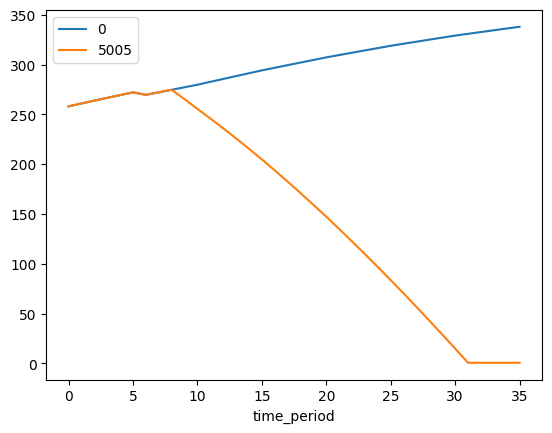

In [19]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "mexico"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [21]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [5]:

importlib.reload(sa)

<module 'setup_analysis' from '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/setup_analysis.py'>

In [96]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
df_out_ippu = model_ippu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ippu,
    model_energy.integration_variables_non_fgtv
)

df_out_energy = model_energy.project(df_ins)



In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [41]:
df_out_energy[
    [x for x in df_out_energy.columns if ("energy_demand_enfu_subsector_total_pj_trns" in x)]
    #[x for x in df_out_energy.columns if ("energy_consumption_trns" in x)]
].sum(axis = 1)


0     6016.964277
1     6056.086091
2     6094.577617
3     6132.070740
4     6168.067295
5     6202.197909
6     6204.582066
7     6252.307569
8     6299.961994
9     6347.547922
10    6395.067807
11    6446.476951
12    6497.533833
13    6548.256856
14    6598.663073
15    6648.768307
16    6691.130187
17    6733.213892
18    6775.031605
19    6816.594832
20    6857.914346
21    6893.262301
22    6928.338002
23    6963.152323
24    6997.715480
25    7032.037204
26    7059.925811
27    7087.556553
28    7114.938648
29    7142.080832
30    7168.991304
31    7188.227868
32    7207.222019
33    7225.981249
34    7244.512793
35    7262.823432
dtype: float64